In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
#Import dataframes 

df_player_stats = pd.read_csv('DataFiles/player_stats.csv')
df_bio = pd.read_csv('DataFiles/df_bio.csv')
data_index = pd.read_csv('DataFiles/data_index.csv')

In [5]:
columns_to_delete = ['PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
                     'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
                     'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
                     'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
                     'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
                     'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
                     'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK']

# Delete the specified columns
df_player_stats.drop(columns=columns_to_delete, inplace=True, errors='ignore')

df_player_stats.rename(columns={'Season_type': 'Season'}, inplace=True)

In [6]:
# Merge 'df_player_stats' and ‘df_bio‘ on common keys ‘PLAYER_ID‘ and ‘Year‘ in order to get 'COUNTRY' column.
merged_df_stats_bio = pd.merge(df_player_stats, df_bio, on=['PLAYER_ID', 'Year', 'Season'], how='inner')

columns_to_delete_merged = ['GP_y','PTS_y','REB_y','AST_y','NET_RATING','OREB_PCT','DREB_PCT','USG_PCT', 'TS_PCT','AST_PCT']

merged_df_stats_bio.drop(columns=columns_to_delete_merged, inplace=True)          

In [7]:
# Checking the result of 'merged_df_stats_bio'
merged_df_stats_bio.shape

(18282, 45)

In [8]:
# Merging 'merged_df_stat_bio' with player index table on player-id to get player´s role/position.
final_merged_df = pd.merge(merged_df_stats_bio, data_index, left_on='PLAYER_ID', right_on='PERSON_ID', how='inner')

# Dropping all duplicate columns with trailing letter 'y'.
columns_to_drop = [col for col in final_merged_df.columns if 'y' in col]
final_merged_df.drop(columns=columns_to_drop, inplace=True)

# Dropping redundant columns
columns_to_drop_2 = [
    'PLAYER_LAST_NAME',
    'PLAYER_FIRST_NAME',
    'PLAYER_SLUG',
    'TEAM_ID',
    'TEAM_SLUG',
    'IS_DEFUNCT',
    'TEAM_NAME',
    'NICKNAME',
    'TEAM_ABBREVIATION',
    'ROSTER_STATUS',
    'STATS_TIMEFRAME', 
    'PERSON_ID',
    'TEAM_CITY'
]

final_merged_df.drop(columns=columns_to_drop_2, inplace=True)

In [9]:
# Drop '_x' at the end of column names 
for column in final_merged_df.columns: 
    if '_x' in column: 
        column_name = column.replace('_x', '')
        final_merged_df.rename(columns={column:column_name}, inplace=True)

# Change regular season name at 'Season' column  
final_merged_df['Season'] = final_merged_df['Season'].apply(lambda x:'Regular Season' if x =='Regular%20Season' else x)

In [10]:
# Output of final dataframe
nj = final_merged_df[(final_merged_df['PLAYER_NAME'] == 'Nikola Jokic')]
nj

# We don´t need:
# PFD, PLAYER_HEIGHT, PLAYER_HEIGHT_INCHES, PLAYER_WEIGHT, PTS, REB, AST

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,PTS,REB,AST,FROM_YEAR,TO_YEAR
15457,203999,Nikola Jokic,1610612743,DEN,21.0,80,31,49,0.388,21.7,3.8,7.5,0.512,0.4,1.1,0.333,1.9,2.4,0.811,2.3,4.7,7.0,2.4,1.3,1.0,0.6,0.7,2.6,2.5,10.0,2015-16,Regular Season,6-10,82.0,250.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023
15458,203999,Nikola Jokic,1610612743,DEN,22.0,73,37,36,0.507,27.9,6.8,11.7,0.578,0.6,1.9,0.324,2.6,3.1,0.825,2.9,6.9,9.8,4.9,2.3,0.8,0.8,0.7,2.9,3.2,16.7,2016-17,Regular Season,6-10,82.0,250.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023
15459,203999,Nikola Jokic,1610612743,DEN,23.0,75,43,32,0.573,32.6,6.7,13.5,0.499,1.5,3.7,0.396,3.5,4.2,0.850,2.6,8.1,10.7,6.1,2.8,1.2,0.8,0.6,2.8,5.1,18.5,2017-18,Regular Season,6-10,82.0,250.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023
15460,203999,Nikola Jokic,1610612743,DEN,24.0,80,53,27,0.663,31.3,7.7,15.1,0.511,1.0,3.4,0.307,3.6,4.4,0.821,2.9,8.0,10.8,7.3,3.1,1.4,0.7,0.8,2.9,5.2,20.1,2018-19,Regular Season,7-0,84.0,250.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023
15461,203999,Nikola Jokic,1610612743,DEN,24.0,14,7,7,0.500,39.7,9.4,18.6,0.506,1.6,4.0,0.393,4.7,5.6,0.846,3.9,9.1,13.0,8.4,2.6,1.1,0.9,0.8,3.9,5.7,25.1,2018-19,Playoffs,7-0,84.0,250.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023
15462,203999,Nikola Jokic,1610612743,DEN,25.0,73,46,27,0.630,32.0,7.7,14.7,0.528,1.1,3.5,0.314,3.4,4.1,0.817,2.3,7.5,9.7,7.0,3.1,1.2,0.6,0.4,3.0,5.0,19.9,2019-20,Regular Season,7-0,84.0,284.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023
15463,203999,Nikola Jokic,1610612743,DEN,25.0,19,9,10,0.474,36.5,9.4,18.1,0.519,2.2,5.2,0.429,3.5,4.2,0.835,1.9,7.9,9.8,5.7,3.3,1.1,0.8,0.8,3.6,5.1,24.4,2019-20,Playoffs,7-0,84.0,284.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023
15464,203999,Nikola Jokic,1610612743,DEN,26.0,72,47,25,0.653,34.6,10.2,18.0,0.566,1.3,3.3,0.388,4.8,5.5,0.868,2.8,8.0,10.8,8.3,3.1,1.3,0.7,0.9,2.7,5.8,26.4,2020-21,Regular Season,6-11,83.0,284.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023
15465,203999,Nikola Jokic,1610612743,DEN,26.0,10,4,6,0.400,34.5,11.6,22.8,0.509,2.0,5.3,0.377,4.6,5.5,0.836,3.7,7.9,11.6,5.0,2.4,0.6,0.9,0.5,2.3,5.8,29.8,2020-21,Playoffs,6-11,83.0,284.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023
15466,203999,Nikola Jokic,1610612743,DEN,27.0,74,46,28,0.622,33.5,10.3,17.7,0.583,1.3,3.9,0.337,5.1,6.3,0.810,2.8,11.0,13.8,7.9,3.8,1.5,0.9,0.9,2.6,6.5,27.1,2021-22,Regular Season,6-11,83.0,284.0,None,Serbia,2014,2,41,15,C,6-11,284.0,26.1,12.3,9.0,2015,2023


In [14]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [15]:
# Function to filer on countries
def filter_europe(df, column_name='', country_list=europe):
    return df[df[column_name].isin(europe)]

# New object df for European players only
europe_df = filter_europe(final_merged_df, 'COUNTRY')
europe_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,PTS,REB,AST,FROM_YEAR,TO_YEAR
69,1059,Aleksandar Djordjevic,1610612757,POR,29.0,8,4,4,0.500,7.8,1.0,2.0,0.500,0.6,0.9,0.714,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.6,0.0,0.0,0.0,0.4,0.0,3.1,1996-97,Regular Season,6-2,74.0,198.0,None,Serbia,Undrafted,Undrafted,Undrafted,19,G,6-2,198.0,3.1,0.6,0.6,1996,1996
286,717,Arvydas Sabonis,1610612757,POR,32.0,69,43,26,0.623,25.5,4.8,9.5,0.498,0.7,1.9,0.371,3.2,4.2,0.777,1.7,6.3,7.9,2.1,2.2,0.9,1.2,0.5,2.9,0.0,13.4,1996-97,Regular Season,7-3,87.0,292.0,None,Lithuania,1986,1,24,11,C,7-3,292.0,12.0,7.3,2.1,1995,2002
287,717,Arvydas Sabonis,1610612757,POR,32.0,4,1,3,0.250,26.8,4.5,10.5,0.429,0.5,2.0,0.250,1.8,2.0,0.875,2.0,4.5,6.5,2.3,2.3,0.8,0.8,1.3,4.8,2.0,11.3,1996-97,Playoffs,7-3,87.0,292.0,None,Lithuania,1986,1,24,11,C,7-3,292.0,12.0,7.3,2.1,1995,2002
288,717,Arvydas Sabonis,1610612757,POR,33.0,73,40,33,0.548,31.9,5.6,11.3,0.493,0.4,1.6,0.261,4.4,5.5,0.798,2.0,7.9,10.0,3.0,2.6,0.9,1.1,0.6,3.7,0.0,16.0,1997-98,Regular Season,7-3,87.0,292.0,None,Lithuania,1986,1,24,11,C,7-3,292.0,12.0,7.3,2.1,1995,2002
289,717,Arvydas Sabonis,1610612757,POR,33.0,4,1,3,0.250,26.6,4.5,10.0,0.450,0.3,0.5,0.500,3.0,3.5,0.857,1.8,6.0,7.8,1.5,2.5,1.8,0.8,1.8,4.8,0.0,12.3,1997-98,Playoffs,7-3,87.0,292.0,None,Lithuania,1986,1,24,11,C,7-3,292.0,12.0,7.3,2.1,1995,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18252,1631217,Moussa Diabate,1610612746,LAC,21.0,22,10,12,0.455,8.9,1.1,2.1,0.511,0.0,0.1,0.500,0.5,0.7,0.625,1.4,0.9,2.3,0.2,0.4,0.3,0.4,0.3,0.7,0.7,2.7,2022-23,Regular Season,6-10,82.0,210.0,Michigan,France,2022,2,43,25,F,6-9,210.0,2.6,2.2,0.4,2022,2023
18254,1631107,Nikola Jovic,1610612748,MIA,20.0,15,7,8,0.467,13.6,1.9,4.6,0.406,0.5,2.3,0.229,1.2,1.3,0.947,0.6,1.5,2.1,0.7,0.7,0.5,0.1,0.0,1.3,1.3,5.5,2022-23,Regular Season,6-10,82.0,205.0,None,Serbia,2022,1,27,5,F,6-10,205.0,6.7,4.1,1.9,2022,2023
18255,1631107,Nikola Jovic,1610612748,MIA,20.0,7,3,4,0.429,1.8,0.1,0.6,0.250,0.0,0.3,0.000,0.0,0.0,0.000,0.1,0.6,0.7,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.3,2022-23,Playoffs,6-10,82.0,205.0,None,Serbia,2022,1,27,5,F,6-10,205.0,6.7,4.1,1.9,2022,2023
18258,1631172,Ousmane Dieng,1610612760,OKC,20.0,39,20,19,0.513,14.6,1.9,4.6,0.420,0.7,2.5,0.265,0.4,0.6,0.652,0.5,2.2,2.7,1.2,0.7,0.4,0.2,0.2,1.1,0.5,4.9,2022-23,Regular Season,6-9,81.0,185.0,None,France,2022,1,11,13,F,6-9,185.0,3.9,1.6,1.1,2022,2023


In [21]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Sort the DataFrame by the 'W' column in descending order
sorted_df = europe_df.sort_values(by='W', ascending=False)

# Get the top 10 players with the most wins
top_10_players = sorted_df.head(10)

# Display the top 10 players with their respective countries
print(top_10_players[['PLAYER_NAME', 'W', 'COUNTRY']])


            PLAYER_NAME   W         COUNTRY
6814          Pau Gasol  64           Spain
9024      Sasha Vujacic  64        Slovenia
7681         Boris Diaw  64          France
4632      Dirk Nowitzki  64         Germany
8909          Luol Deng  62  United Kingdom
14660      Clint Capela  62     Switzerland
12733         Omer Asik  62          Turkey
10866   Marco Belinelli  61           Italy
5021   Rasho Nesterovic  61        Slovenia
6964        Tony Parker  61          France


In [ ]:
import pandas as pd


# Step 1: Sort the DataFrame by the 'W' column in descending order
sorted_df = europe_df.sort_values(by='W', ascending=False)

# Step 2: Get the top 10 players with the most wins
top_10_players = sorted_df.head(10)

# Step 3: Filter the original DataFrame to get the full player profiles of these top 10 players
top_10_player_profiles = europe_df[europe_df['PLAYER_ID'].isin(top_10_players['PLAYER_ID'])]

# Display the full player profiles of the top 10 players
print(top_10_player_profiles)


In [ ]:


# Display the first few rows of the dataset
print(europe_df.head())

# Display summary statistics of numerical columns
print(europe_df.describe())

# Check the data types of columns
print(europe_df.dtypes)

# Check for missing values
print(europe_df.isnull().sum())


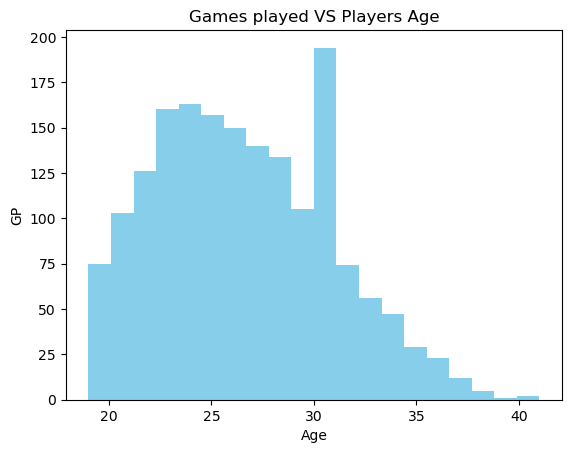

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of player ages
plt.hist(europe_df['AGE'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('GP')
plt.title('Games played VS Players Age')
plt.show()



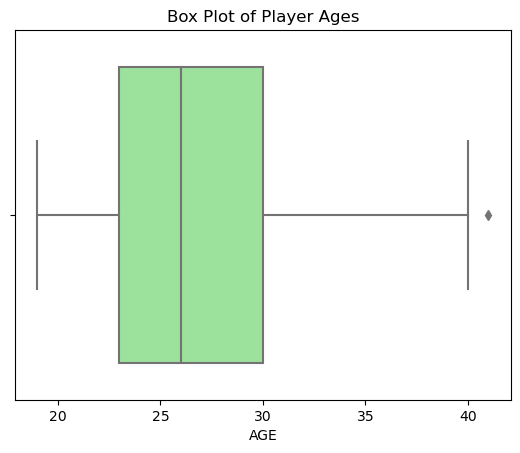

In [29]:
# Box plot of player ages
sns.boxplot(x='AGE', data=europe_df, color='lightgreen')
plt.title('Players Age')
plt.show()

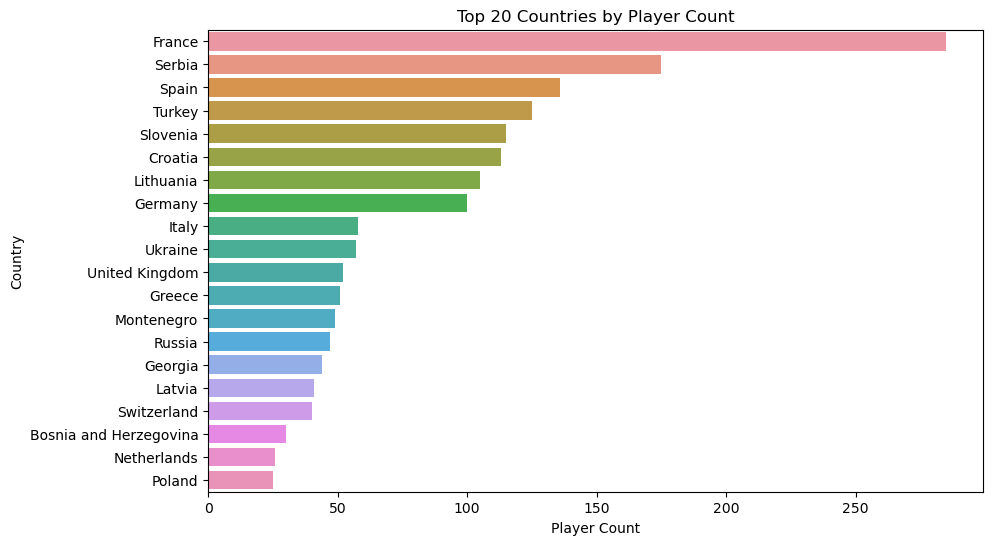

In [34]:
# Bar plot of countries
plt.figure(figsize=(10, 6))
sns.countplot(y='COUNTRY', data=europe_df, order=europe_df['COUNTRY'].value_counts().index[:20])
plt.title('Top 20 Countries by Player Count')
plt.xlabel('Player Count')
plt.ylabel('Country')
plt.show()

/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_14210/795084639.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = europe_df.corr()


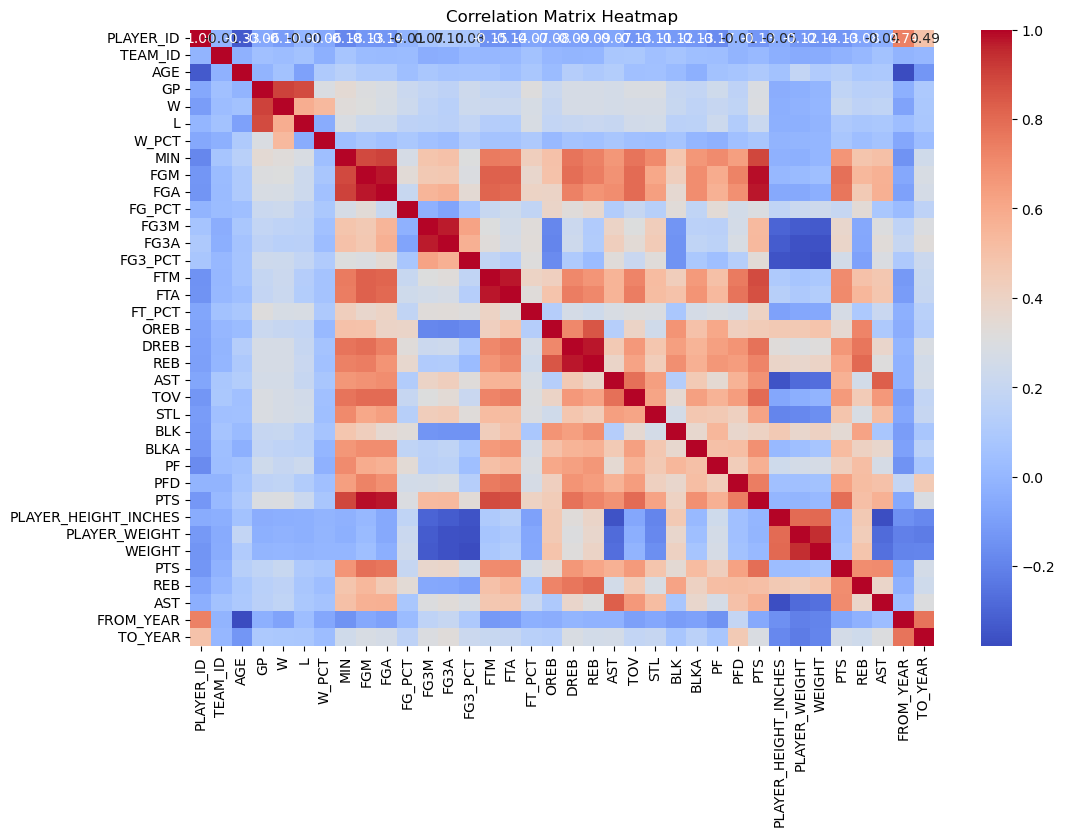

In [35]:
# Compute correlation matrix
corr_matrix = europe_df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [39]:
# Check data types of selected columns
print(europe_df[['AGE', 'GP', 'W', 'L', 'PTS']].dtypes)


AGE    float64
GP       int64
W        int64
L        int64
PTS    float64
PTS    float64
dtype: object


In [40]:
# Convert selected columns to numeric
europe_df[['AGE', 'GP', 'W', 'L', 'PTS']] = europe_df[['AGE', 'GP', 'W', 'L', 'PTS']].apply(pd.to_numeric, errors='coerce')

# Check data types again
print(europe_df[['AGE', 'GP', 'W', 'L', 'PTS']].dtypes)


AGE    float64
GP       int64
W        int64
L        int64
PTS    float64
PTS    float64
dtype: object


/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_14210/715799802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_df[['AGE', 'GP', 'W', 'L', 'PTS']] = europe_df[['AGE', 'GP', 'W', 'L', 'PTS']].apply(pd.to_numeric, errors='coerce')
/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_14210/715799802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_df[['AGE', 'GP', 'W', 'L', 'PTS']] = europe_df[['AGE', 'GP', 'W', 'L', 'PTS']].apply(pd.to_numeric, errors='coerce')
/var/folde

In [45]:
# Average points per game by team abbreviation
team_points = europe_df.groupby('TEAM_ABBREVIATION')['PTS'].mean().sort_values(ascending=False)
print(team_points)

# Average age by team abbreviation
team_age = europe_df.groupby('TEAM_ABBREVIATION')['AGE'].mean().sort_values(ascending=False)
print(team_age)


TypeError: sort_values() missing 1 required positional argument: 'by'

In [47]:
# Average points per game by team abbreviation
team_points = europe_df.groupby('TEAM_ABBREVIATION')['PTS'].mean().sort_values(ascending=False)
print(team_points)

# Average age by team abbreviation
team_age = europe_df.groupby('TEAM_ABBREVIATION')['AGE'].mean().sort_values(ascending=False)
print(team_age)


TypeError: sort_values() missing 1 required positional argument: 'by'